In [51]:
# set.seed(42)

library(cluster)
library(mclust)

source("../R/dbscan.R")
dbscan <- DBSCAN$new(eps = 0.5)

n <- 100
X1 <- matrix(rnorm(n * 3, mean = 0, sd = 0.3), ncol = 3)
X2 <- matrix(rnorm(n * 3, mean = 3, sd = 0.3), ncol = 3)
X3 <- matrix(rnorm(n * 3, mean = 6, sd = 0.3), ncol = 3)
X <- rbind(X1, X2, X3)
true_labels <- c(rep(1, n), rep(2, n), rep(3, n))
dbscan$fit(X)

dbscan$compute_silhouette_score() - mean(silhouette(dbscan$get_labels(), dist(X))[,"sil_width"])
dbscan$compute_adjusted_rand_index(true_labels) - adjustedRandIndex(dbscan$get_labels(), true_labels)
dbscan$compute_noise_ratio()

[1] 3.330669e-16

[1] 0

[1] 0.01666667

In [57]:
# set.seed(42)

library(cluster)
library(mclust)

source("../R/dbscan.R")
dbscan <- DBSCAN$new(eps = 0.5)

# Generate 2D data
X1 <- matrix(rnorm(n * 2, mean = 0, sd = 0.3), ncol = 2)
X2 <- matrix(rnorm(n * 2, mean = 3, sd = 0.3), ncol = 2)
X3 <- matrix(rnorm(n * 2, mean = 6, sd = 0.3), ncol = 2)
X <- rbind(X1, X2, X3)
true_labels <- c(rep(1, n), rep(2, n), rep(3, n))
dbscan$fit(X)

# Evaluate DBSCAN
dbscan$compute_silhouette_score() - mean(silhouette(dbscan$get_labels(), dist(X))[,"sil_width"])
dbscan$compute_adjusted_rand_index(true_labels) - adjustedRandIndex(dbscan$get_labels(), true_labels)
dbscan$compute_noise_ratio()


[1] 0

[1] 0

[1] 0.003333333

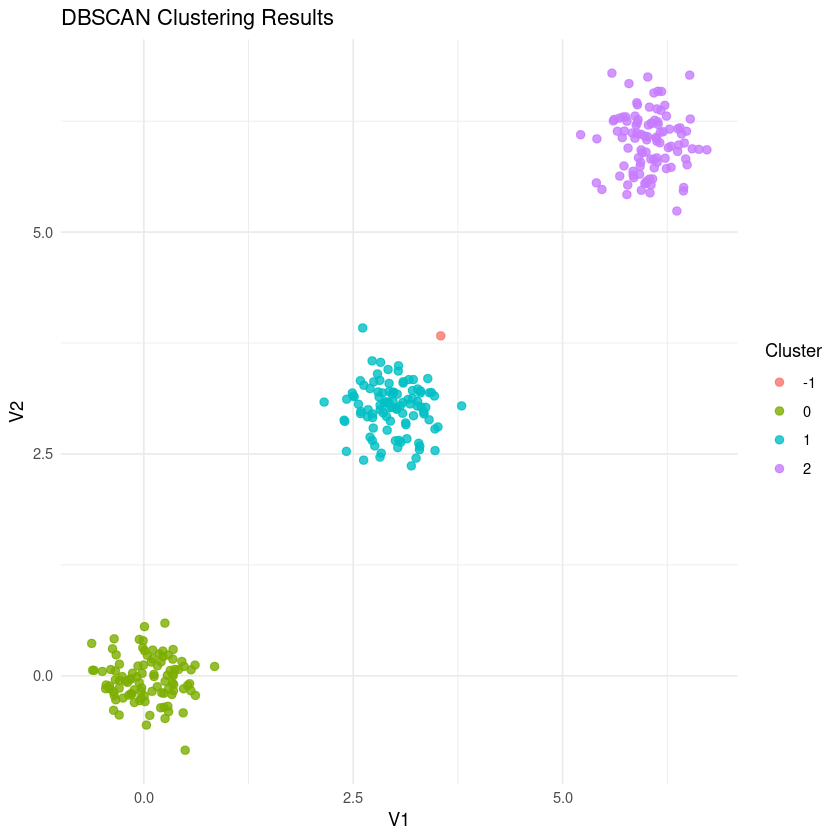

In [58]:
dbscan$plot_clusters(X)